**By Kurosh Karimi**

#### This project belongs to IBM Data Analyst Professional Course

We have a dataset, names 'master', belonging to a Stack Overflow Developer Survey, depositted at SQLite database, named "m4_survey_data.sqlite". 'master' gathers information about developers' demographics, work habits, technology usage, compensation, etc. This survey covers different areas such as:


**Demographics**: Age, Country, EdLevel, UndergradMajor, and Dependents

**Professional Experience**: YearsCode, YearsCodePro, OrgSize, Employment, and JobSat, capturing the respondents' professional experience, job satisfaction, and current employment status.


**Compensation**: CompTotal, CompFreq, and ConvertedComp implying the respondents' total salary, frequency and converted to annual sum


**Work Habits**: WorkWeekHrs, WorkRemote, and WorkLoc includes information on work habits and environments


**Technology and Practices**: OpSys, BlockchainOrg, CodeRev, and UnitTests shows respondents' use of technology, involvement with blockchain, and development practices

**And some other informatio** like Respondent, MainBranch, Hobbyist, Employment, and SOVisitFreq



**TASK:**
1. Download the database file (m4_survey_data.sqlite) from the following url and connect to it

In [ ]:
     url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

Then using pandas, and 'read_sql_query' method, answer the following questions: 
2. Print all the table names in the database
3. How many rows are there in the 'master' table
4. read the column headers of the master table
5. Plot a histogram of ConvertedComp column
6. Plot a box plot of Age column
7. Creat a scatter plot of Age VS WorkWeekHrs
8. Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size

In [13]:
# 1. Connecting to the database

import pandas as pd
import sqlite3
conn = sqlite3.connect('m4_survey_data.sqlite') 

In [14]:
# 2. printing all the table names in the database

QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [9]:
# 3. The number of rows in the table named 'master'

QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [16]:
# 4. reading the column headers

QUERY = """
SELECT * FROM master
"""
pd.read_sql_query(QUERY, conn).columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

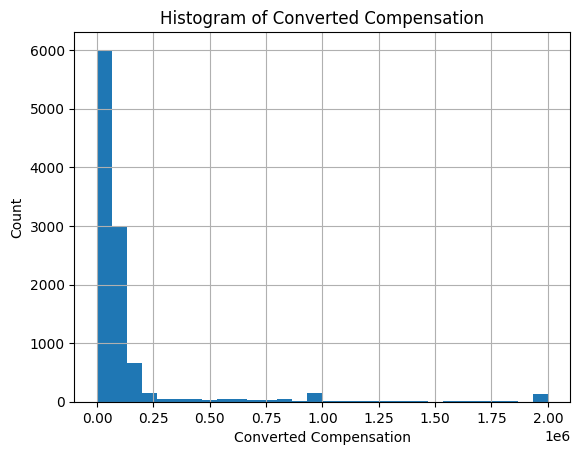

In [19]:
# 5. Plotting a histogram of ConvertedComp.

QUERY = """SELECT * FROM master"""

df = pd.read_sql_query(QUERY,conn)

import matplotlib.pyplot as plt
plt.hist(x=df['ConvertedComp'], bins=30)
plt.xlabel('Converted Compensation')
plt.ylabel('Count')
plt.title('Histogram of Converted Compensation')
plt.grid()

<Axes: xlabel='Age'>

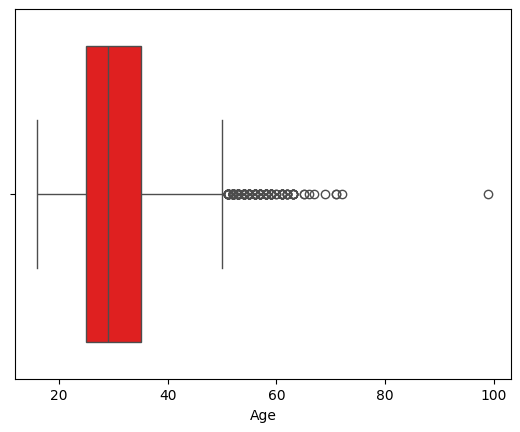

In [21]:
# 6. Plotting a box plot of Age column

import seaborn as sns
sns.boxplot(data=df, x='Age', color='red')

Create a scatter plot of `Age` and `WorkWeekHrs.`


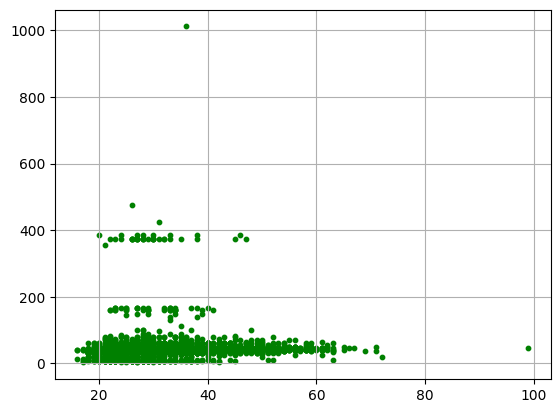

In [22]:
# 7. Creating a scatter plot of Age VS WorkWeekHrs.
plt.scatter(df['Age'], df['WorkWeekHrs'], marker='o', color='green', s=10)
plt.grid()


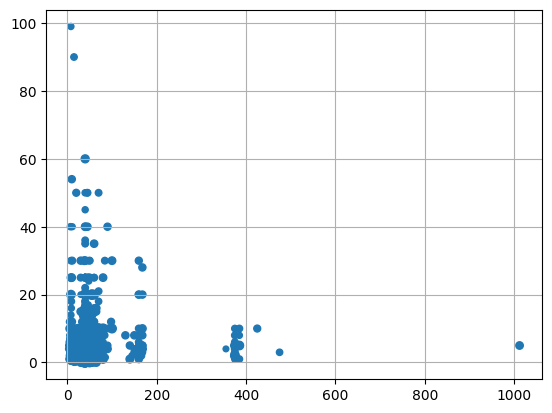

In [24]:
# 8. Creating bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size 
plt.scatter(x='WorkWeekHrs', y='CodeRevHrs', s=df['Age']*0.8, data=df)
plt.grid()


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [26]:
# 9. Create a pie chart of the top 5 databases that respondents wish to learn next year.
#    Label the pie chart with database names. Display percentages of each database on the pie chart.

QUERY = """ SELECT * FROM DatabaseDesireNextYear"""

df1 = pd.read_sql_query(QUERY,conn)
df1

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


DatabaseDesireNextYear
PostgreSQL       4328
MongoDB          3649
Redis            3331
MySQL            3281
Elasticsearch    2856
Name: count, dtype: int64

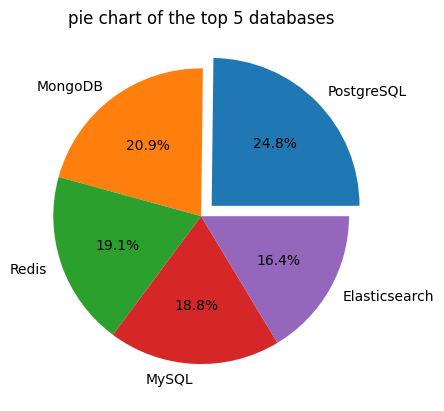

In [27]:
top_DBs = df1['DatabaseDesireNextYear'].value_counts().head(5)
plt.pie(top_DBs, labels=top_DBs.index, 
        autopct='%1.1f%%',
        explode=[0.1, 0,0,0, 0])
plt.title('pie chart of the top 5 databases')
top_DBs       

In [17]:
conn.close()